In [122]:
#imports

import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt

In [123]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='D:\\projects\\Garbage Classification\\Garbage',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(512, 384),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 2527 files belonging to 6 classes.


In [125]:
class_names = dataset.class_names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [126]:
len(dataset)

79

In [127]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 512, 384, 3)
[3 4 1 1 0 1 3 5 3 4 3 3 2 3 3 0 3 3 1 0 0 3 5 3 2 2 1 1 4 4 0 1]


In [128]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[255.       255.       255.      ]
  [255.       255.       255.      ]
  [255.       255.       255.      ]
  ...
  [ 84.83319   71.83319   62.83319 ]
  [ 79.        66.        57.5     ]
  [ 84.833405  71.833405  63.833405]]

 [[255.       255.       255.      ]
  [255.       255.       255.      ]
  [255.       255.       255.      ]
  ...
  [ 83.166626  71.72909   62.208267]
  [ 82.4375    69.4375    60.9375  ]
  [ 88.68756   75.68756   67.68756 ]]

 [[255.       255.       255.      ]
  [255.       255.       255.      ]
  [255.       255.       255.      ]
  ...
  [ 95.04147   85.35392   75.14561 ]
  [ 85.8125    73.9375    64.875   ]
  [ 86.68753   74.81253   66.06253 ]]

 ...

 [[206.83333  205.83333  201.83333 ]
  [206.       205.       201.      ]
  [206.       205.       201.      ]
  ...
  [170.       167.       162.      ]
  [170.       167.       162.      ]
  [169.16666  166.16666  161.16666 ]]

 [[206.83333  205.83333  201.83333 ]
  [206.       205.       201.      ]


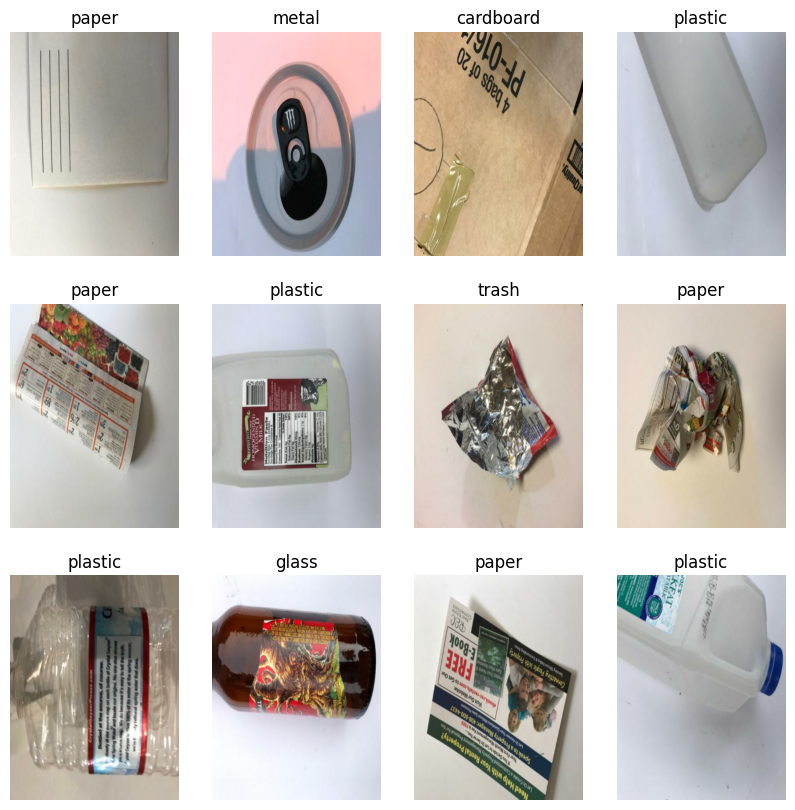

In [129]:
plt.figure(figsize=(10, 10))

for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

plt.show()

In [130]:
train_size  = 0.8
len(dataset) * train_size

63.2

In [131]:
train_ds = dataset.take(63)
len(train_ds)

63

In [132]:
test_ds = dataset.skip(63)
len(test_ds)

16

In [133]:
val_size = 0.1
len(dataset)*0.1 

7.9

In [134]:
val_ds = dataset.take(7)
len(val_ds)

7

In [135]:
test_ds = test_ds.skip(7)
len(test_ds)

9

In [136]:
def get_dataset_partitions(dataset, 
                           train_split=0.7, 
                           val_split=0.1, 
                           test_split=0.1, 
                           shuffle=True, 
                           shuffle_size=10000):

    dataset_size = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size + val_size)

    return train_ds, val_ds, test_ds
    

In [137]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [138]:
len(train_ds), len(val_ds), len(test_ds)

(55, 7, 17)

In [139]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [140]:
resize_and_rescale = Sequential([
    layers.Resizing(512, 384),
    layers.Rescaling(1.0/255)
])

In [141]:
data_arguments = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2) 
])

In [142]:
#train model 

model = Sequential([
    resize_and_rescale,
    data_arguments,
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(512, 384)),
    layers.MaxPooling2D((2, 2))
    ])

c:\Users\Malavi\python380\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
input_shape = (32, 512, 384, 3)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\Malavi\python380\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [150]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_13 (Sequential)      │ (32, 512, 384, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (32, 510, 382, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (32, 255, 191, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (32, 253, 189, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (32, 126, 94, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (32, 124, 92, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (32, 62, 46, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (32, 60, 44, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (32, 30, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (32, 28, 20, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (32, 14, 10, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (32, 12, 8, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (32, 6, 4, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (32, 1536)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 64)               │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 6)                │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,862 (1.01 MB)

 Trainable params: 265,862 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [151]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [152]:
history = model.fit(train_ds, 
          epochs=50, 
          batch_size=32,
          verbose=1,
          validation_data=val_ds)

Epoch 1/50


c:\Users\Malavi\python380\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


55/55 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.2157 - loss: 1.7613 - val_accuracy: 0.2232 - val_loss: 1.7155
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.2908 - loss: 1.6750 - val_accuracy: 0.3304 - val_loss: 1.6306
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.3550 - loss: 1.5607 - val_accuracy: 0.3839 - val_loss: 1.4985
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3553 - loss: 1.4906 - val_accuracy: 0.3839 - val_loss: 1.5030
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.4207 - loss: 1.4424 - val_accuracy: 0.4107 - val_loss: 1.3603
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.4791 - loss: 1.2973 - val_accuracy: 0.5045 - val_loss: 1.2684
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5072 - loss: 1.1912 - val_accuracy: 0.5268 - val_loss: 1.2261
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5661 - loss: 1.1943 - val_accuracy: 0.5536 - val_loss: 1.1918


In [148]:
for images, labels in train_ds.take(1):
    print(set(labels.numpy()))

{np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}
